# Geographic Data: GeoJSON and TopoJSON

*This first half of this geo section is taken from 
https://github.com/uwdata/visualization-curriculum with minor modifications.*

Up to this point, we have worked with JSON and CSV formatted datasets that correspond to data tables made up of rows (records) and columns (fields). In order to represent geographic regions (countries, states, _etc._) and trajectories (flight paths, subway lines, _etc._), we need to expand our repertoire with additional formats designed to support rich geometries.

[GeoJSON](https://en.wikipedia.org/wiki/GeoJSON) models geographic features within a specialized JSON format. A GeoJSON `feature` can include geometric data &ndash; such as `longitude`, `latitude` coordinates that make up a country boundary &ndash; as well as additional data attributes.

Here is a GeoJSON `feature` object for the boundary of the U.S. state of Colorado:

~~~ json
{
  "type": "Feature",
  "id": 8,
  "properties": {"name": "Colorado"},
  "geometry": {
    "type": "Polygon",
    "coordinates": [
      [[-106.32056285448942,40.998675790862656],[-106.19134826714341,40.99813863734313],[-105.27607827344248,40.99813863734313],[-104.9422739227986,40.99813863734313],[-104.05212898774828,41.00136155846029],[-103.57475287338661,41.00189871197981],[-103.38093099236758,41.00189871197981],[-102.65589358559272,41.00189871197981],[-102.62000064466328,41.00189871197981],[-102.052892177978,41.00189871197981],[-102.052892177978,40.74889940428302],[-102.052892177978,40.69733266640851],[-102.052892177978,40.44003613055551],[-102.052892177978,40.3492571857556],[-102.052892177978,40.00333031918079],[-102.04930288388505,39.57414465707943],[-102.04930288388505,39.56823596836465],[-102.0457135897921,39.1331416175485],[-102.0457135897921,39.0466599009048],[-102.0457135897921,38.69751011321283],[-102.0457135897921,38.61478847120581],[-102.0457135897921,38.268861604631],[-102.0457135897921,38.262415762396685],[-102.04212429569915,37.738153927339205],[-102.04212429569915,37.64415206142214],[-102.04212429569915,37.38900413964724],[-102.04212429569915,36.99365914927603],[-103.00046581851544,37.00010499151034],[-103.08660887674611,37.00010499151034],[-104.00905745863294,36.99580776335414],[-105.15404227428235,36.995270609834606],[-105.2222388620483,36.995270609834606],[-105.7175614468747,36.99580776335414],[-106.00829426840322,36.995270609834606],[-106.47490250048605,36.99365914927603],[-107.4224761410235,37.00010499151034],[-107.48349414060355,37.00010499151034],[-108.38081766383978,36.99903068447129],[-109.04483707103458,36.99903068447129],[-109.04483707103458,37.484617466122884],[-109.04124777694163,37.88049961001363],[-109.04124777694163,38.15283644441336],[-109.05919424740635,38.49983761802722],[-109.05201565922046,39.36680339854235],[-109.05201565922046,39.49786885730673],[-109.05201565922046,39.66062637372313],[-109.05201565922046,40.22248895514744],[-109.05201565922046,40.653823231326896],[-109.05201565922046,41.000287251421234],[-107.91779872584989,41.00189871197981],[-107.3183866123281,41.00297301901887],[-106.85895696843116,41.00189871197981],[-106.32056285448942,40.998675790862656]]
    ]
  }
}
~~~

The `feature` includes a `properties` object, which can include any number of data fields, plus a `geometry` object, which in this case contains a single polygon that consists of `[longitude, latitude]` coordinates for the state boundary.

To learn more about the nitty-gritty details of GeoJSON, see the [official GeoJSON specification](http://geojson.org/) or read [Tom MacWright's helpful primer](https://macwright.org/2015/03/23/geojson-second-bite).

One drawback of GeoJSON as a storage format is that it can be redundant, resulting in larger file sizes. Consider: Colorado shares boundaries with six other states (seven if you include the corner touching Arizona). Instead of using separate, overlapping coordinate lists for each of those states, a more compact approach is to encode shared borders only once, representing the _topology_ of geographic regions. Fortunately, this is precisely what the [TopoJSON](https://github.com/topojson/topojson/blob/master/README.md) format does!

There is a list of There is a list of Countries often make geojson
Countries often make geojson

Let's load a TopoJSON file of world countries (at 110 meter resolution):

In [1]:
import altair as alt
from vega_datasets import data


alt.renderers.enable('mimetype')

world = data.world_110m()
# This is a large dictionary so we don't want to print out all the values
world.keys()

dict_keys(['type', 'transform', 'objects', 'arcs'])

In [2]:
world['objects'].keys()

dict_keys(['land', 'countries'])

In the data above, the `objects` property indicates the named elements we can extract from the data: geometries for all `countries`, or a single polygon representing all `land` on Earth. Either of these can be unpacked to GeoJSON data we can then visualize.

As TopoJSON is a specialized format, we need to instruct Altair to parse the TopoJSON format, indicating which named faeture object we wish to extract from the topology. The following code indicates that we want to extract GeoJSON features from the `world` dataset for the `countries` object:

In [3]:
# We need to use the url that points to the json format, not the dictionary
world_map = alt.topo_feature(data.world_110m.url, 'countries')
world_map

UrlData({
  format: TopoDataFormat({
    feature: 'countries',
    type: 'topojson'
  }),
  url: 'https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/world-110m.json'
})

Now that we can load geographic data, we're ready to start making maps!

## Geoshape Marks

To visualize geographic data, Altair provides the `geoshape` mark type. To create a basic map, we can create a `geoshape` mark and pass it our TopoJSON data, which is then unpacked into GeoJSON features, one for each country of the world:

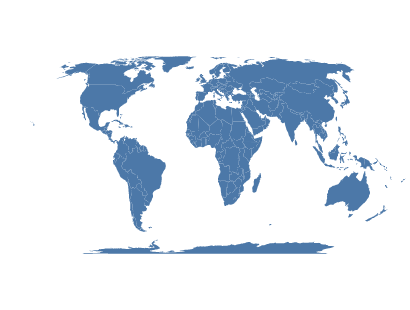

In [4]:
# alt.Chart(alt.topo_feature(data.world_110m()['objects']['caountries']['geometries']).mark_geoshape()
# alt.Chart(alt.Data(values=data.world_110m())).mark_geoshape()
alt.Chart(world_map).mark_geoshape()

In the example above, Altair applies a default blue color and uses a default map projection (`mercator`). We can customize the colors and boundary stroke widths using standard mark properties. Using the `project` method we can also add our own map projection ([there are many interesting map projections](https://en.wikipedia.org/wiki/List_of_map_projections)):

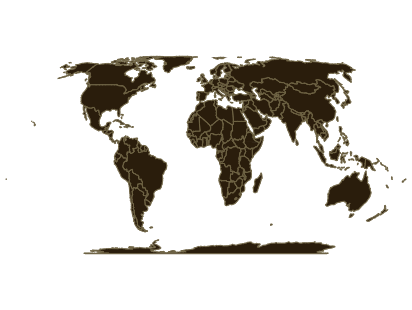

In [5]:
# https://en.wikipedia.org/wiki/Equal_Earth_projection
alt.Chart(world_map).mark_geoshape(
    fill='#2a1d0c', stroke='#706545', strokeWidth=1
).project(type='equalEarth')

By default Altair automatically adjusts the projection so that all the data fits within the width and height of the chart. We can also specify projection parameters, such as `scale` (zoom level) and `translate` (panning), to customize the projection settings. Here we adjust the `scale` and `translate` parameters to focus on Europe:

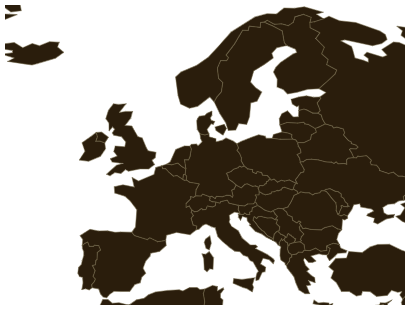

In [6]:
alt.Chart(world_map).mark_geoshape(
    fill='#2a1d0c', stroke='#706545', strokeWidth=0.5
).project(type='naturalEarth1', scale=500, translate=[140, 610])

If we want information on regions within a country,
we have to use a geo/topojson file that contains this info.
There is already one in the vega demo datasets for the US,
so let's use that one.

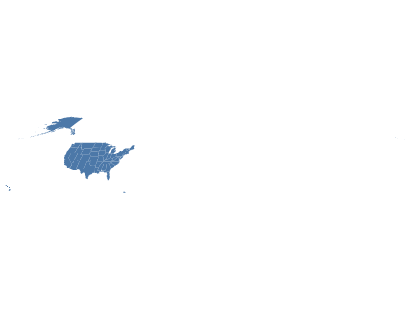

In [7]:
state_map = alt.topo_feature(data.us_10m.url, 'states')

alt.Chart(state_map).mark_geoshape()

This is not too useful on its own,
it is very small and both Alaska and Hawaii 
are shown far away from the rest of the US.
There is a special projection of America
that is more ideal when only showing this country.

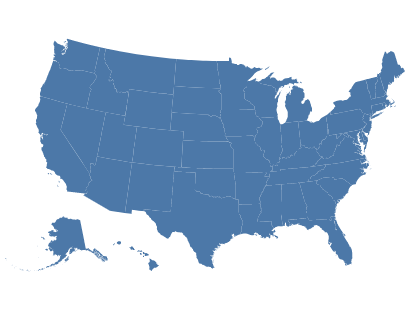

In [8]:
alt.Chart(state_map).mark_geoshape().project(type='albersUsa')

That looks better!

We could make this into a heatmap
by encoding the color to be a variable from the geojson.
If we inspected the geojson table,
we would find that it does contain the ID of each state
in alphabetical order,
so let's use this for demo purposes.
Because we are not using a pandas df,
we mush specify the type of data in the column.

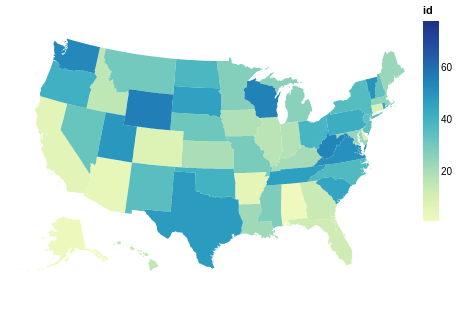

In [9]:
(alt.Chart(state_map).mark_geoshape().encode(
    color='id:Q')
.project(type='albersUsa'))

This type of geographical heatmap is called a choropleth,
and we will learn more about it later in this lecture.
To color NANs in grey instead melting together with the background,
see these links:

- https://stackoverflow.com/questions/59223458/alt-condition-not-working-for-choropleth-missing-values-n-a
- https://stackoverflow.com/questions/55229651/dealing-with-missing-values-nulls-in-altair-choropleth-map
- https://stackoverflow.com/questions/58698545/can-you-add-a-label-for-missing-data-to-a-legend-for-an-altair-chart

## Linking datasets together via lookups

Although any arbitrary information could be put in a geojson file,
they often only contain spatial coordinates
and we need to link any variables of interest from another data set
together with the json file.

For example,
we might have this table with the population for each state.

In [10]:
state_pop = data.population_engineers_hurricanes()[['state', 'id', 'population']]
state_pop[:5]

,state,id,population
0,Alabama,1,4863300
1,Alaska,2,741894
2,Arizona,4,6931071
3,Arkansas,5,2988248
4,California,6,39250017


So how do we link these two tables together?
We could do it manually,
possibly by using geopandas,
but Altair also allows us to do it in the plot call itself
by *looking up* the data in the other dataset
via a shared key column.
We have ID in alphabetical order,
just like the geojson so let's use this as the common column in the lookup.
The columns we want to fetch from the dataframe are passed in a list,
here it is only the population.

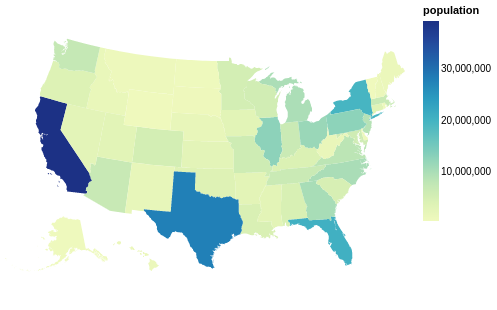

In [11]:
(alt.Chart(state_map).mark_geoshape().transform_lookup(
    lookup='id',
    from_=alt.LookupData(state_pop, 'id', ['population']))
.encode(color='population:Q')
.project(type='albersUsa'))

The `transform_lookup` is [a one sided join similar to `pd.merge(how='left')`,
which you can read more about in the Altair docs](https://altair-viz.github.io/user_guide/transform/lookup.html).

## Map interactivity 

Let's also set the tooltip so we can see which state has which name.

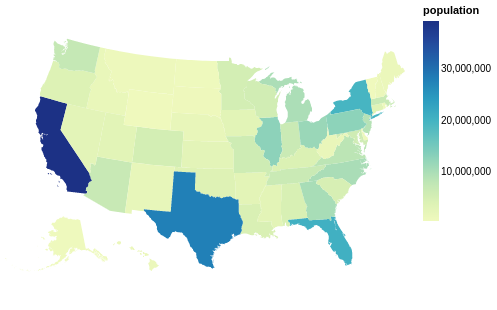

In [12]:
(alt.Chart(state_map).mark_geoshape().transform_lookup(
    lookup='id',
    from_=alt.LookupData(state_pop, 'id', ['population', 'state']))
.encode(
    color='population:Q',
    tooltip=['state:N', 'population:Q'])
.project(type='albersUsa'))

We could add a selection do this map,
the same way we learned in last lecture.

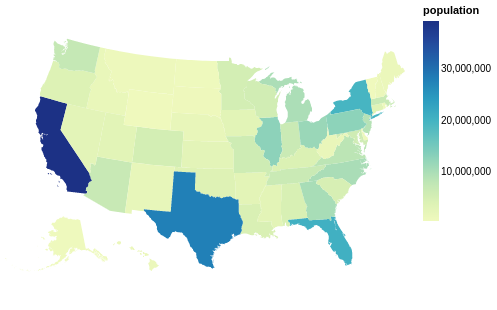

In [13]:
map_click = alt.selection_multi()

(alt.Chart(state_map).mark_geoshape().transform_lookup(
    lookup='id',
    from_=alt.LookupData(state_pop, 'id', ['population', 'state']))
.encode(
    color='population:Q',
    opacity=alt.condition(map_click, alt.value(1), alt.value(0.2)),
    tooltip=['state:N', 'population:Q'])
.add_selection(map_click)
.project(type='albersUsa'))

Let's have the selection do something meaningful.

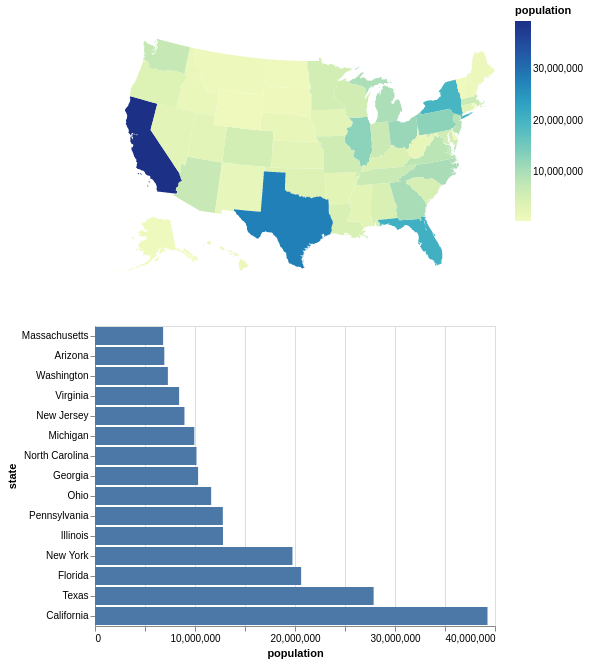

In [14]:
map_click = alt.selection_multi(fields=['state'])

choropleth = (alt.Chart(state_map).mark_geoshape().transform_lookup(
    lookup='id',
    from_=alt.LookupData(state_pop, 'id', ['population', 'state']))
.encode(
    color='population:Q',
    opacity=alt.condition(map_click, alt.value(1), alt.value(0.2)),
    tooltip=['state:N', 'population:Q'])
.add_selection(map_click)
.project(type='albersUsa'))

bars = (alt.Chart(state_pop.nlargest(15, 'population')).mark_bar().encode(
    x='population',
    y=alt.Y('state', sort='x'))
.transform_filter(map_click))

choropleth & bars

Let's make the bars clickable also and add a splash of color to them.
On the click even,
we will set the stroke color of both the bars and the map.

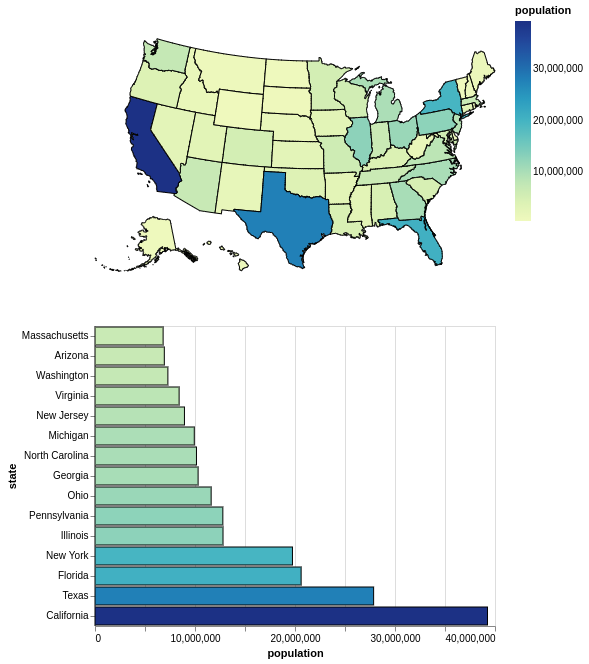

In [15]:
map_click = alt.selection_multi(fields=['state'])
bar_click = alt.selection_multi(fields=['state'])

choropleth = (alt.Chart(state_map).mark_geoshape().transform_lookup(
    lookup='id',
    from_=alt.LookupData(state_pop, 'id', ['population', 'state']))
.encode(
    color='population:Q',
    stroke=alt.condition(bar_click, alt.value('black'), alt.value('#ffffff')),
    opacity=alt.condition(map_click, alt.value(1), alt.value(0.2)),
    tooltip=['state:N', 'population:Q'])
.add_selection(map_click)
.project(type='albersUsa'))

bars = (alt.Chart(state_pop.nlargest(15, 'population')).mark_bar().encode(
    x='population',
    stroke=alt.condition(bar_click, alt.value('black'), alt.value('#ffffff')),
    color='population',
    y=alt.Y('state', sort='x'))
.add_selection(bar_click)
.transform_filter(map_click))

choropleth & bars

One annoyance is that the outline of the map looks broken.
This is because the outilne of the non-selected regions is drawn in white,
and sometimes it is drawn on top of the black, covering it.
What we really want is transparency!
HTML colors can control transparency in the hex code directly,
by setting two extra characters at the end.
They range from `00` (transparent) to `ff` (opaque).

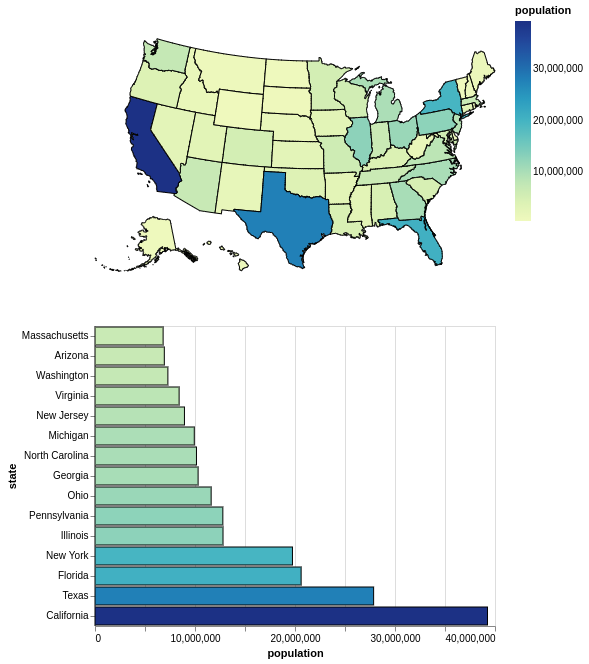

In [16]:
map_click = alt.selection_multi(fields=['state'])
bar_click = alt.selection_multi(fields=['state'])

choropleth = (alt.Chart(state_map).mark_geoshape().transform_lookup(
    lookup='id',
    from_=alt.LookupData(state_pop, 'id', ['population', 'state']))
.encode(
    color='population:Q',
    stroke=alt.condition(bar_click, alt.value('black'), alt.value('#ffffff00')),
    opacity=alt.condition(map_click, alt.value(1), alt.value(0.2)),
    tooltip=['state:N', 'population:Q'])
.add_selection(map_click)
.project(type='albersUsa'))

bars = (alt.Chart(state_pop.nlargest(15, 'population')).mark_bar().encode(
    x='population',
    stroke=alt.condition(bar_click, alt.value('black'), alt.value('#ffffff00')),
    color='population',
    y=alt.Y('state', sort='x'))
.add_selection(bar_click)
.transform_filter(map_click))

choropleth & bars

Now we can always see the outline!

Rather than clicking the bars, 
it would be cool if we could just hover over them 
to quicker see what is what in the plot.

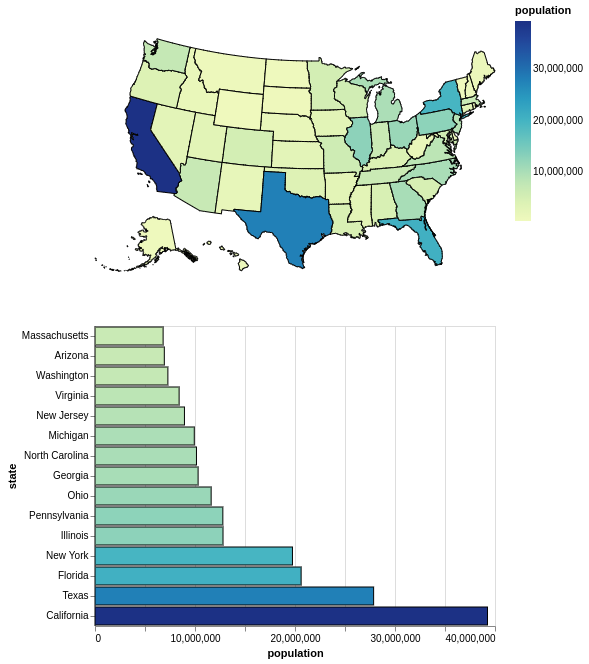

In [17]:
map_click = alt.selection_multi(fields=['state'])
bar_click = alt.selection_multi(fields=['state'], on='mouseover')

choropleth = (alt.Chart(state_map).mark_geoshape().transform_lookup(
    lookup='id',
    from_=alt.LookupData(state_pop, 'id', ['population', 'state']))
.encode(
    color='population:Q',
    stroke=alt.condition(bar_click, alt.value('black'), alt.value('#ffffff00')),
    opacity=alt.condition(map_click, alt.value(1), alt.value(0.2)),
    tooltip=['state:N', 'population:Q'])
.add_selection(map_click)
.project(type='albersUsa'))

bars = (alt.Chart(state_pop.nlargest(15, 'population')).mark_bar().encode(
    x='population',
    stroke=alt.condition(bar_click, alt.value('black'), alt.value('#ffffff00')),
    color='population',
    y=alt.Y('state', sort='x'))
.add_selection(bar_click)
.transform_filter(map_click))

choropleth & bars

Neat! 

However,
sometimes the map blinks and we see all borders, why?
This happens when we transition from one bar to another 
and might hit a space between where our selection is cleared
and everything is highlighted.
To ensure that something is always highlighted,
we can use the `nearest` parameter (on increase the bar width in this case).

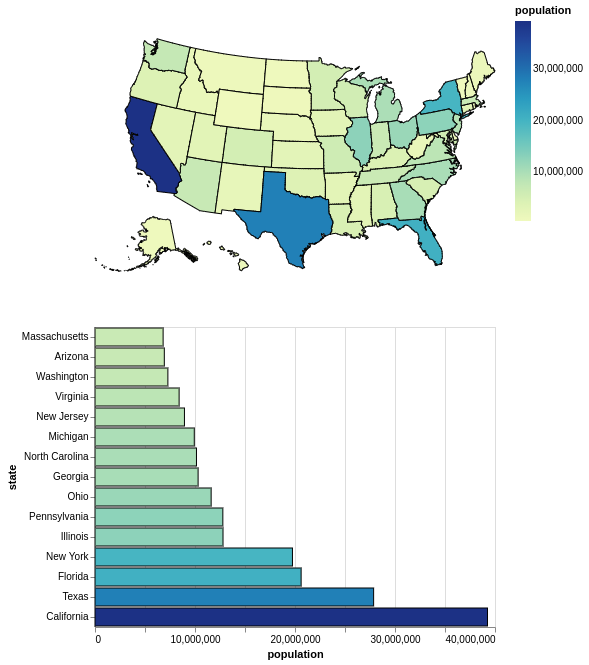

In [18]:
map_click = alt.selection_multi(fields=['state'])
bar_click = alt.selection_multi(fields=['state'], on='mouseover', nearest=True)

choropleth = (alt.Chart(state_map).mark_geoshape().transform_lookup(
    lookup='id',
    from_=alt.LookupData(state_pop, 'id', ['population', 'state']))
.encode(
    color='population:Q',
    stroke=alt.condition(bar_click, alt.value('black'), alt.value('#ffffff00')),
    opacity=alt.condition(map_click, alt.value(1), alt.value(0.2)),
    tooltip=['state:N', 'population:Q'])
.add_selection(map_click)
.project(type='albersUsa'))

bars = (alt.Chart(state_pop.nlargest(15, 'population')).mark_bar().encode(
    x='population',
    stroke=alt.condition(bar_click, alt.value('black'), alt.value('#ffffff00')),
    color='population',
    y=alt.Y('state', sort='x'))
.add_selection(bar_click)
.transform_filter(map_click))

choropleth & bars

## A note on choropleth interpretation

Although pretty,
choropleth maps have the disadvantage of hiding regions that have small land areas,
even when it is not relevant for the measurement that we are showing
(some small states might have really high population density,
but they would remain hidden in the choropleth map when we color by pop density).
In the chart below we can see the result from a recent american election (2012).
Just looking at this map,
do you think it was an even race?

Images from http://www-personal.umich.edu/~mejn/election/2012/

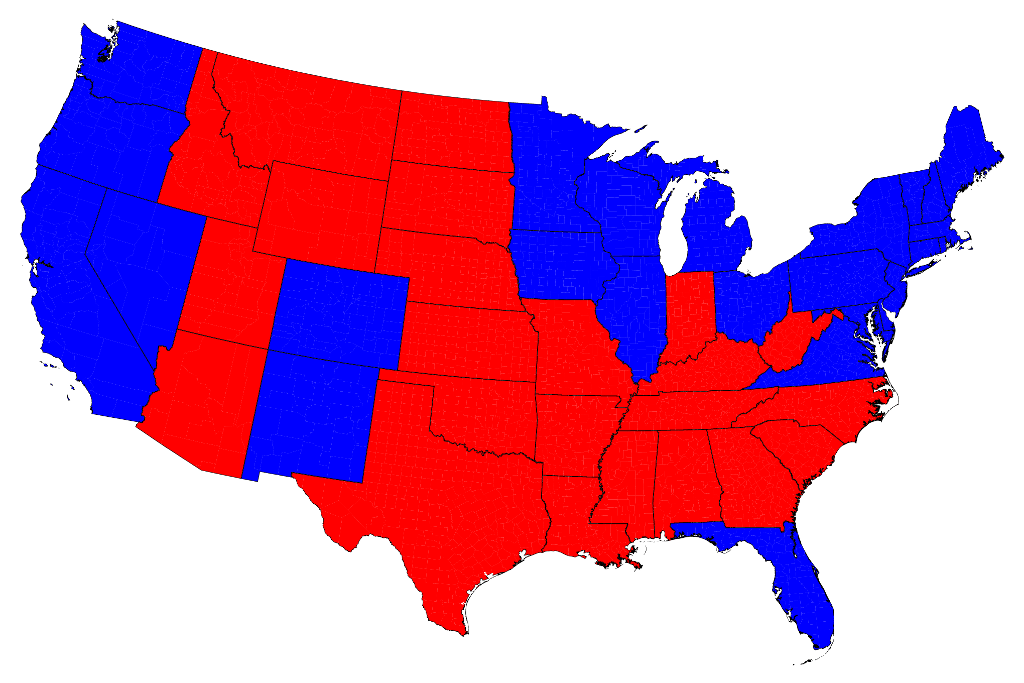

It looks like it was pretty tight,
but in fact it was a blowout.
This is Obama's 332-206 victory in 2012,
but the map does not show 62% blue region,
since it is scaled by land area,
rather than scaled by votes.
Maps scaled by other variables than area,
are called cartograms,
and there is one for the 2012 election.

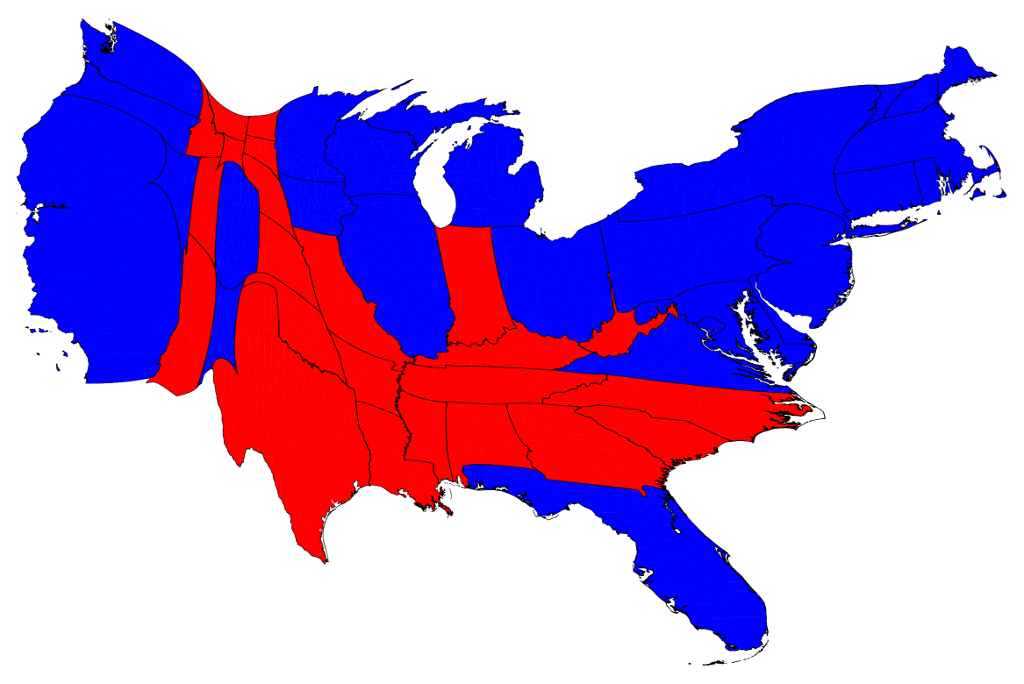

Now it looks more like an overwhelming blue victory.

Another way to create cartograms is by pixelation:

Images from https://www.ft.com/content/3685bf9e-a4cc-11e6-8b69-02899e8bd9d1

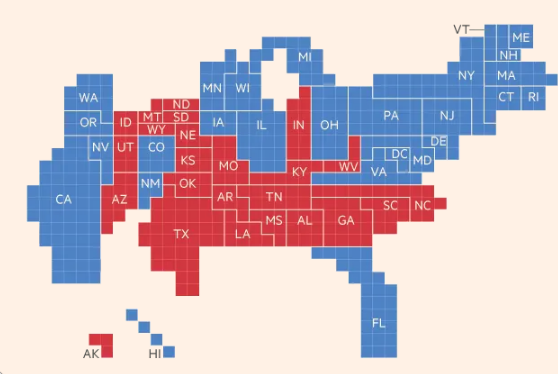

Or simply include a graphical mark such as a circle as the mean coordinates for each state
and scaling it proportionally.
This is a great visualization that is easy to interpret,
and it could be overlayed a map if needed
(sometimes it might still be hard to see big circles in small regions close together).

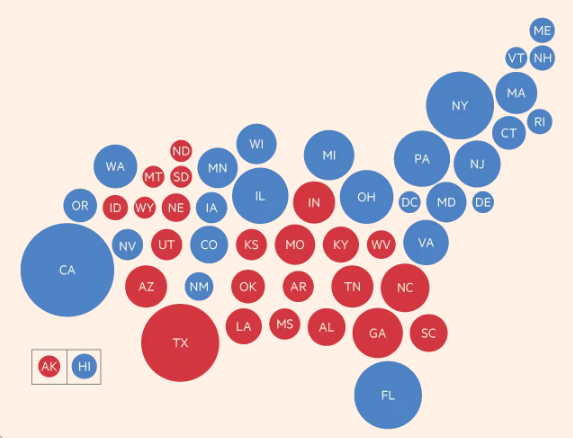

Altair has [a nice example of dots overlaying a geoshape](https://altair-viz.github.io/gallery/airports_count.html)
and a [cool interactive version showing all airport connections](https://altair-viz.github.io/gallery/airport_connections.html).
To make sure the marks line up with the underlying map
even when the projection changes,
we need to use the `longitude` and `latitude` parameters
rather than `x` and `y`
as seen in this example from the Altair docs

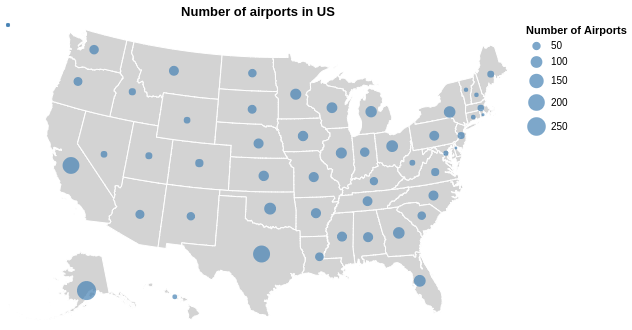

In [19]:
airports = data.airports.url
states = alt.topo_feature(data.us_10m.url, feature='states')

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project('albersUsa')

# This `transform_aggregate` step could have been performed in pandas instead
points = alt.Chart(airports).transform_aggregate(
    latitude='mean(latitude)',
    longitude='mean(longitude)',
    count='count()',
    groupby=['state']
).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    size=alt.Size('count:Q', title='Number of Airports'),
    color=alt.value('steelblue'),
    tooltip=['state:N','count:Q']
).properties(
    title='Number of airports in US'
)

background + points

## A dataset with IDs for all the world's countries

The world geojson file contains the ID of each geometry,
similar to the US states data.
However,
we need a dataset that links these IDs to country names,
and there is none in the vega_datasets repo.
I have uploaded one to the `data` folder of the 532 github repo that you can use
([originally from here](https://raw.githubusercontent.com/KoGor/Map-Icons-Generator/master/data/world-110m-country-names.tsv)).

In [20]:
import pandas as pd

country_ids = pd.read_csv('../data/country-ids.csv') 
country_ids[:5]

,id,name
0,4,Afghanistan
1,8,Albania
2,12,Algeria
3,24,Angola
4,10,Antarctica


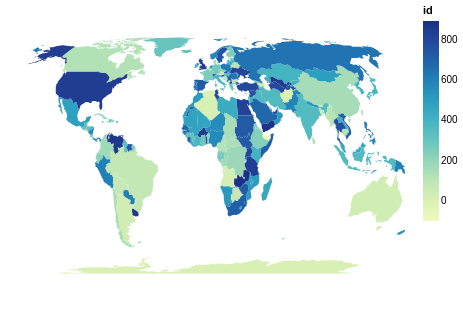

In [21]:
(alt.Chart(world_map).mark_geoshape().transform_lookup(
    lookup='id',
    from_=alt.LookupData(country_ids, 'id', ['name']))
 .encode(tooltip='name:O', color='id:Q')
 .project('equalEarth', scale=90))

Unless you have previous experience with geojson,
I advice against trying to merge geojson files
to create a custom file with only your countries of interest.
At least in my testing,
this was not very straightfoward,
and it is easier to just use one country with regions inside it,
or the world with countries instead of regions.
If you are interested in trying or looking at geojsons
for countries other than the US,
look into the following resources:

- https://github.com/topojson/world-atlas
- https://github.com/topojson/us-atlas
- https://geojson-maps.ash.ms/
- https://funkeinteraktiv.github.io/geo-data-merger/
- http://code.highcharts.com/mapdata/
- https://gadm.org/download_country_v3.html
- http://www.naturalearthdata.com/downloads/
- https://github.com/mapbox/geojson-merge
- https://mapshaper.org/

Lastly,
here is a cool visualization of all the countries in the world ordered by area: https://www.jasondavies.com/maps/countries-by-area/